# Discretization of the diffusion equation using the FVM

We want to solve the one-dimensional steady state diffusion equation for the property $\phi$.  The governing equation for this problem is expressed as follows:

\begin{equation}
\frac{\partial}{\partial x} (\Gamma \frac{\partial \phi}{\partial x}) + S_{\phi}
\label{e1}
\end{equation}


A sample control volume is shown in the figure below,

<img src="figs/uni.gif",width=500>
<h4 align="center">Figure 1</h4> 

Let us integrate this equation over every control volume $CV$ of the domain to obtain

\begin{equation}
\int_{CV} \frac{\partial}{\partial x} (\Gamma \frac{\partial \phi}{\partial x}) dV + \int_{CV} S_{\phi} dV
\label{e2}
\end{equation}


By applying gauss divergence theorem to convert volume integrals into surface integrals, we get the following equation

\begin{equation}
\oint _{A} \frac{\partial}{\partial x} (\Gamma \frac{\partial \phi}{\partial x}) \cdot \mathbf{n}dA + \oint _{CV} S_{\phi} dV
\label{e3}
\end{equation}


In the previous equation $\mathbf{n}$ is the normal to the face and $dA$ is the area of the face.

Integrating the previous equation over a control volume, we obtain

\begin{equation}
\left[ \Gamma A \frac{\partial \phi}{\partial x} \right]_e - \left[ \Gamma A \frac{\partial \phi}{\partial x} \right]_w + \overline{S} \Delta V
\label{e4}
\end{equation}

where $\Delta V$ is the volume of the control volume and $\overline{S}$ is the average value of the source term $S$ over the control volume.

In the above equation, we can evaluate the diffusive fluxes as follows

\begin{equation}
\left[ \Gamma A \frac{\partial \phi}{\partial x} \right]_e = \Gamma_e A_e \left[ \frac{\phi_E - \phi_P}{\Delta_{PE}} \right] = \Gamma_e A_e \left[ \frac{\phi_E - \phi_P}{\Delta} \right]
\label{e5}
\end{equation}

\begin{equation}
\left[ \Gamma A \frac{\partial \phi}{\partial x} \right]_w = \Gamma_w A_w \left[ \frac{\phi_P - \phi_W}{\Delta_{WP}} \right] = \Gamma_w A_w \left[ \frac{\phi_P - \phi_W}{\Delta} \right]
\label{e6}
\end{equation}

In equations 5 and 6 we computed the gradient of $\phi$ by using central differencing, which is a second order approximation.  We also assumed that $\Delta_{PE} = \Delta_{WP} = \Delta$  and $\Delta_{Pe}=\Delta_{wP}=\Delta / 2$, meaning that we are dealing with a uniform mesh (refer to figure 1).

Have in mind that we can use the same method with nun-unigorm grids, the only difference is that we will need to store more geometrical information.

The source term appearing in equation 4, can be expressed as follows

\begin{equation}
\overline{S} \Delta V = S_u + S_p \phi_P
\label{e7}
\end{equation}

Substituting equations 5, 6 and 7 into equation 4, we get 

\begin{equation}
\Gamma_e A_e  \left[ \frac{\phi_E - \phi_P}{\Delta} \right] - \Gamma_w A_w  \left[ \frac{\phi_P - \phi_W}{\Delta} \right] + (S_u + S_p \phi_P)
\label{e8}
\end{equation}

rearranging equation 8 we obtain


\begin{equation}
\left[  \frac{\Gamma_e}{\Delta} A_e + \frac{\Gamma_w}{\Delta} A_w - S_p   \right] \phi_P = \left[  \frac{\Gamma_w}{\Delta} A_w   \right] \phi_W + \left[  \frac{\Gamma_e}{\Delta} A_e   \right] \phi_E + S_u
\label{e9}
\end{equation}

Identifying the coefficients appearing in equation 9 and grouping everything, the above equation can be written as


\begin{equation}
a_P \phi_P = a_W \phi_W + a_E \phi_E + S_u
\label{e10}
\end{equation}


where

\begin{equation}
\begin{split}
a_W &= \frac{\Gamma_w}{\Delta_{WP} } A_w = \frac{\Gamma_w}{\Delta } A_w \\
a_E &= \frac{\Gamma_e}{\Delta_{PE} } A_e = \frac{\Gamma_e}{\Delta } A_e\\
a_P &= a_W + a_E - S_p
\end {split}
\label{e11}
\end{equation}


Equations 10 and 7, represent the discretized form of equation 1.

In figure 2, we illustrate the grid layout of boundary face A.  Boundary faces requires special treatment.

<img src="figs/bc1.gif",width=500>
<h4 align="center">Figure 2</h4> 

Integrating equation 1 over the control volume P (as shown in figure 2), we can obtain the discretized equation of the boundary face,

\begin{equation}
\Gamma_e A_e  \left[ \frac{\phi_E - \phi_P}{\Delta_{PE}} \right] - \Gamma_w A_w  \left[ \frac{\phi_P - \phi_A}{\Delta_{wP}} \right]
\label{e12}
\end{equation}

The previous expression shows that the flux through control volume boundary face A has been approximated by assuming a linear relationship between temperatures at boundary face A (where the value is known) and control volume center P.

Rearranging equation 12 and assuming that $\Delta_{PE} = \Delta$  and $\Delta_{Pe}=\Delta_{wP}=\Delta / 2$ (uniform mesh), we obtain


\begin{equation}
\left[  \frac{\Gamma_e}{\Delta} A_e + \frac{2 \Gamma_w}{\Delta} A_w   \right] \phi_P = 0 \times \phi_W + \left[  \frac{\Gamma_e}{\Delta} A_e   \right] \phi_E + \left[  \frac{2 \Gamma_e}{\Delta} A_e   \right] \phi_A 
\label{e13}
\end{equation}

Comparing equation 13 to equation 9, it can be seen that the boundary value enters the calculation as a surce term in the form of $S_u + S_p \phi_P$, with $S_u = (2 \Gamma_w A_w / \Delta) \phi_A$ and $S_p = -2 \Gamma_w A_w / \Delta$, and the link to the west boundary side has been suppressed by setting  the coefficient $\phi_W$ equal to zero.

Equation 13 can be expressed in the same form as equation 10 to yield the discretized equation for the boundary control volume,

\begin{equation}
a_P \phi_P = a_W \phi_W + a_E \phi_E + S_u
\label{e14}
\end{equation}


where

\begin{equation}
\begin{split}
a_W &= 0 \\
a_E &= \frac{\Gamma_e A_e}{\Delta } \\
a_P &= a_W + a_E - S_p \\
S_p &= - \frac{2 \Gamma_w A_w}{\Delta} \\
S_u &= \frac{2 \Gamma_w A_w}{\Delta} \phi_A
\end {split}
\label{e15}
\end{equation}

In figure 3, we illustrate the grid layout of boundary face B. 

<img src="figs/bc2.gif",width=500>
<h4 align="center">Figure 3</h4> 

The control volume that belongs to boundary face B can be treated in a similar way as for boundary face A (figure 2).  Assuming that $\Delta_{WP} = \Delta$  and $\Delta_{Pe}=\Delta_{wP}=\Delta / 2$ (uniform mesh), its discretized equation is given by,

\begin{equation}
\Gamma_e A_e  \left[ \frac{\phi_B - \phi_P}{\Delta / 2} \right] - \Gamma_w A_w  \left[ \frac{\phi_P - \phi_W}{\Delta} \right]
\label{e16}
\end{equation}

Rearranging equation 16 we obtain,

\begin{equation}
\left[  \frac{\Gamma_e}{\Delta} A_e + \frac{2 \Gamma_w}{\Delta} A_w   \right] \phi_P = \left[  \frac{\Gamma_e}{\Delta} A_e   \right] \phi_W + 0 \times \phi_E + \left[  \frac{2 \Gamma_e}{\Delta} A_e   \right] \phi_B
\label{e17}
\end{equation}

Then, the discretized equation for the boundary control volume can be expressed as,

\begin{equation}
a_P \phi_P = a_W \phi_W + a_E \phi_E + S_u
\label{e18}
\end{equation}

where

\begin{equation}
\begin{split}
a_W &= \frac{\Gamma_w A_w}{\Delta } \\
a_E &= 0 \\
a_P &= a_W + a_E - S_p \\
S_p &= - \frac{2 \Gamma_w A_w}{\Delta} \\
S_u &= \frac{2 \Gamma_w A_w}{\Delta} \phi_B
\end {split}
\label{e19}
\end{equation}

Equations 10 and 11 are valid for all interior control volumes; whereas equations 14, 15, 18 and 19 are valid for boundary control volumes.

In the previous equations and as we are dealing with a uniform grid, the face values of $\Gamma$ are given by

$$
\Gamma_w = \frac{\Gamma_W + \Gamma_P}{2}
$$

$$
\Gamma_e = \frac{\Gamma_P + \Gamma_E}{2}
$$

where we used linear interpolation (which is a second order approximation).

## Summary

The general form of the discretized equations can be expressed as follows,

$$
a_P \phi_P = \sum a_{nb} \phi_{nb} + S_u
$$

where $\sum$ indicates summation over all neighbouring control volumes ($nb$), $a_{nb}$ are the neightbouring coefficients, and $(S_u + S_p \phi_P)$ is the linearized source term.

Also, the coeffcients around cell center $P$ satisfy the following relation

$$
a_P = \sum a_{nb} - S_p
$$

## Working example

Consider the problem of source-free heat conduction in an insulated rod whose ends are maintained at constant temperatures of $100^{\circ} \, C$ and $500^{\circ} \, C$ respectively. The problem is governed by equation 1.  

Calculate the steady state temperature distribution in the rod.  

Assume: 

* Thermal conductivity $k$ is equal to $1000 \, W/m.K$

* Heat generation $q$ is equal to $0$

* Cross-sectional area A is $10 \times 10^{-3} \, m^2$

* Rod length is $L_{rod} = 0.5 \, m$

* $T_A = 100^{\circ} \, C$ 

* $T_B = 500^{\circ} \, C$

* Use 5 cells, then increase the number of cells in the domain.

The analytical solution to this problem is given by

$$
T(x) = \left[ \frac{ T_B - T_A }{ L_{rod}}   +  \frac{q}{2 k}    (L_{rod} - x ) \right] \, x + T_A
$$

In [1]:
%matplotlib inline

In [2]:
#Function to create the uniform grid

import numpy as np

def mesh(val1,val2,val3):
    
#val1 is initial distance 
#val2 is final distance 
#val3 is number of cells in domain 
    
    x=np.linspace(val1,val2,val3)
    return x

In [18]:
#Definition of boundary conditions, physical properties and grid dimensions

#Total number of cells
#if i want 5 cells i need 5 (tc) plus one
tc=6

#left boundary condition or TA
lbc = 100.0

#left boundary condition or TB
rbc = 500.0

#Thermal conductivity coefficient
kcoe = 1000

#source term (heat generation)
qcoe = 0*1000

#Cross-section area
#area=10*10**-3
area=0.01


#1-d domain start and end point
l_start = 0.0
l_end = 0.5

#delta cell (spacing delta)
delta = (l_end - l_start)/(tc-1)
#delta=0.1

In [19]:
#Create grid and initializa arrays
#Compute cell center

#call mesh function
x=mesh(l_start,l_end,tc)

#The lenght of x which is equal to tc
y=len(x)

#array with mesh cell centers
#mcc = np.empty([y-1])
mcc = np.zeros([y-1])

iter=0

for i in x:
#for i in range(1,y):

    iter=iter+1

    if iter<y:
        
#Position of actual cell center
        cc=(((x[i+1]-x[i])/2) + i)
        
#This is the array with the position of cell center
        mcc[iter-1]=cc
        #mcc[iter]=cc

In [20]:
#compute coefficients of internal control volumes
#We are assuming that the area is constant and delta is constant (uniform grid)

aw = (kcoe*area)/delta
ae = (kcoe*area)/delta
sp = 0
ap = aw + ae - sp 


In [21]:
#Assemble array of internal control volumes
#FVM coefficients

#mic = np.empty([len(mcc),len(mcc)])
mic = np.zeros([len(mcc),len(mcc)])

for i in range(0,len(mcc)):
    
    if i>0 and i<len(mcc)-1:
    
        for j in range(0,len(mcc)):
            
            #Fill in diagonal
            if i==j:
                #mic[i,i]=(kcoe*area)/delta + (kcoe*area)/delta
                mic[i,i] = ap
            
            #Fill in off-diagonal -1
            elif j==i-1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*aw
            
            #Fill in off-diagonal +1
            elif j==i+1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*ae
                
            else:
                mic[i,j]=0

In [22]:
#compute coefficients of boundary control volumes
#We are assuming that the area is constant and delta is constant (uniform grid)

awb = (kcoe*area)/delta
aeb = (kcoe*area)/delta
spb = -1*(kcoe*area)/(delta/2)

#apb = awb + aeb - spb 

In [23]:
#Add boundary control volumes contribution to FVM coefficients matrix

#mic = np.empty([len(mcc),len(mcc)])
#np.shape(mic)

for i in range(0,len(mcc)):
    
    #if i<1:
    if i==0:
    
        for j in range(0,len(mcc)):
                
            if i==j:
                #mic[i,i]=(kcoe*area)/delta + (kcoe*area)/(delta/2)
                mic[i,i] = aeb - spb
            
            elif j==i+1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*aeb
                
            #else:
            #    mic[i,j]=0
            
    elif i==len(mcc)-1:
        
        for j in range(0,len(mcc)):
                
            if i==j:
                #mic[i,i]=(kcoe*area)/delta + kcoe*area/(delta/2)
                mic[i,i] = awb - spb
                
            elif j==i-1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*awb

In [24]:
#Boundary control volume coefficients
#Contribution of constant part or Su

su_l = ((kcoe*area)/(delta/2))*lbc
su_r = ((kcoe*area)/(delta/2))*rbc
#apb = awb + aeb - spb 

In [25]:
#Assmeble rhs with boundary conditions
#BCs are hardwired to dirichlet

#rhs = np.empty([len(mcc)])
rhs = np.zeros([len(mcc)])

#rhs[0]=((kcoe*area)/(delta/2))*lbc
#rhs[len(mcc)-1] = ((kcoe*area)/(delta/2))*rbc

#Add possible contribution of source terms
su = (qcoe*area*delta)
#su = 1000

rhs[:] = su

#Add to RHS bontribution of boundary conditions (su_l and su_r) and source terms (su)
rhs[0] = su_l + su
rhs[len(mcc)-1] = su_r + su

In [26]:
#Solve linear system

import numpy as np

sol = np.linalg.solve(mic, rhs)

#where sol is the vector containing the solution
#mic is the matrix with the influence coefficients
#rhs is the vector with the boundary conditions and source term contribution

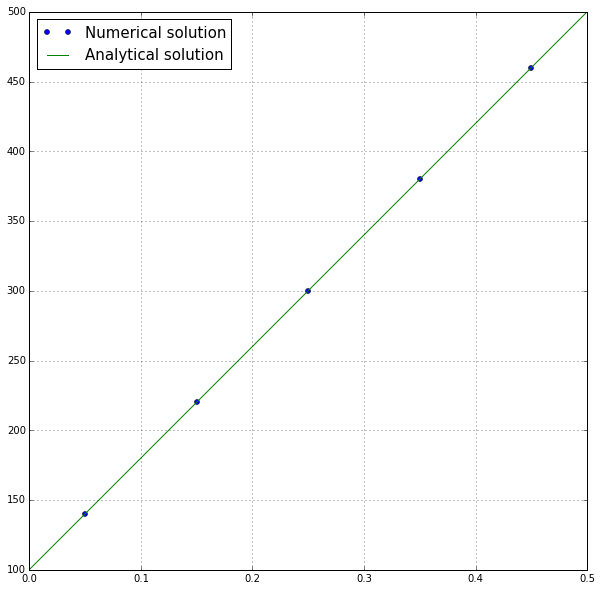

In [27]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,10))

plt.plot(mcc,sol,'o',markersize=5,label='Numerical solution')

#Analytical solution
#xsol=np.linspace(l_start,l_end,1000)
#asol = 800*xsol + 100

#Compute analytical solution
xsol=np.linspace(l_start,l_end,1000)
asol = ((rbc-lbc)/(l_end - l_start) + (qcoe/(2*kcoe))*((l_end - l_start) - xsol))*xsol + lbc

plt.plot(xsol,asol,label='Analytical solution')

plt.legend(loc=2,fontsize=15)
plt.grid()

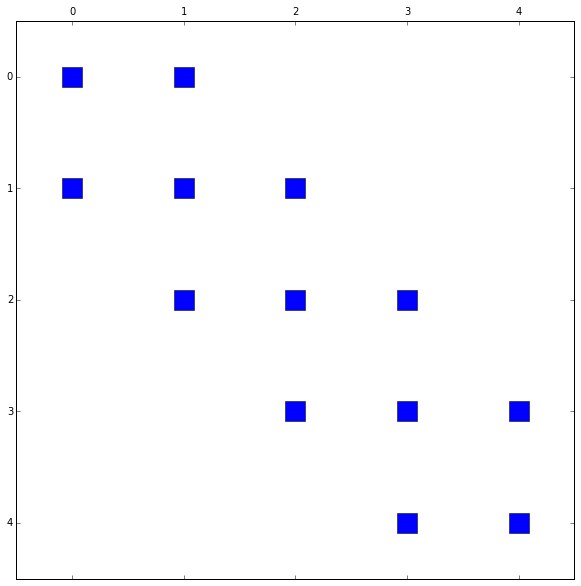

In [28]:
#Plot sparse matrix

import matplotlib.pylab as plt
import scipy.sparse as sps

plt.figure(figsize=(10,10))

plt.spy(mic,markersize=20,marker='s')

<matplotlib.colorbar.Colorbar instance at 0x10636ad88>

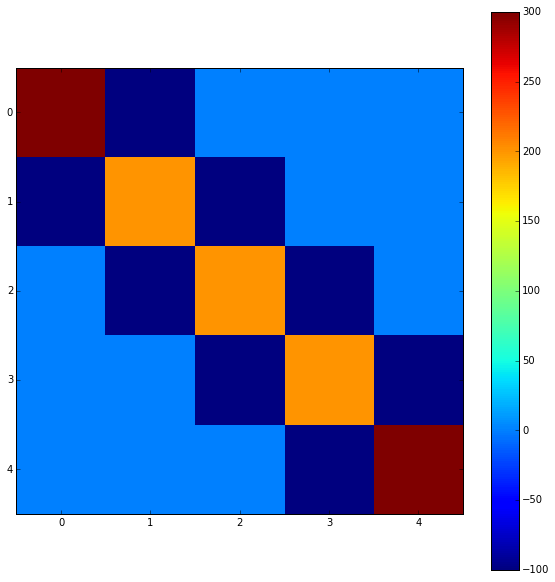

In [29]:
#Plot sparse matrix

import matplotlib.pylab as plt

plt.figure(figsize=(10,10))

#full scale
#plt.imshow(mic,interpolation='none',cmap='binary')
#plt.imshow(mic,interpolation='nearest',cmap='binary')

#full scale
plt.imshow(mic,interpolation='nearest')

#normalize scale
#plt.imshow(mic,interpolation='nearest',vmin=-1, vmax=1)

plt.colorbar()

In [30]:
mic

array([[ 300., -100.,    0.,    0.,    0.],
       [-100.,  200., -100.,    0.,    0.],
       [   0., -100.,  200., -100.,    0.],
       [   0.,    0., -100.,  200., -100.],
       [   0.,    0.,    0., -100.,  300.]])

In [31]:
rhs

array([  20000.,       0.,       0.,       0.,  100000.])

In [32]:
sol

array([ 140.,  220.,  300.,  380.,  460.])

In [33]:
#Save the array mic in an output file

#np.savetxt('test.out', mic, delimiter=',')   # X is an array
#np.savetxt('test.out', mic)   # X is an array
#np.savetxt('test.out', mic, fmt='%1.4e')   # use exponential notation
#np.savetxt('test.out', mic, fmt='%d')   # decimal
#np.savetxt('test.out', mic, fmt='%.2f')   # floating point
#np.savetxt('test.out', mic, fmt='%f')   # floating point